# STEREO-HAND-TRACKING

### Import

In [8]:
import random
import numpy as np
from matplotlib import pyplot as plt

import os
import pickle
import cv2
from typing import Any, Tuple

import scipy.io
from tqdm.notebook import tqdm

from src.stereo_matching import StereoMatcher
from src.hand_modeling import HandModeler
from src.data_loading import DataLoader

%matplotlib inline

# For auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading

In [9]:
dataloader = DataLoader('data')
left, right, label = dataloader.load_zip('B1')

Extracting B1:   0%|          | 0/6000 [00:00<?, ?it/s]

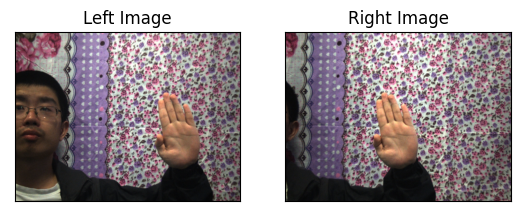

In [10]:
left_im, right_im = left[0], right[0]

fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(left_im, cv2.COLOR_BGR2RGB))
axes[0].set_title('Left Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(right_im, cv2.COLOR_BGR2RGB))
axes[1].set_title('Right Image'), axes[1].set_xticks([]), axes[1].set_yticks([]);

## Hand Segmentation

In [87]:
hand_modeler = HandModeler(fps=24, wait_time=5)

In [88]:
foreground = None
for frame in range(len(left)):
    left_frame = left[frame]
    foreground = hand_modeler.estimate_hand(left_frame)
    if (foreground is not None):
        cv2.imshow("Frame " + str(frame), foreground)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

KeyboardInterrupt: 